<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2022-01-01">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>

<h1 align="center"><font size="5">Supervised Machine Learning: Classification - Final Assignment</font></h1>


# Library Import

In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt

In [32]:
import warnings

warnings.filterwarnings('ignore')

In [2]:
RANDOM_STATE = 123

# Introduction

The target of this workbook is to create a model that accurately predicts what GPA class a student belongs to based on a number of factors. \

It will also be used to investigate using various techniques to address bias in dataset using class_weights, under sampling and SMOTE.

# Dataset Import

* Name: Students Performance Dataset
* Source: kaggle
* Url: https://www.kaggle.com/datasets/rabieelkharoua/students-performance-dataset

In [3]:
student_df = pd.read_csv('student_performance_data.csv')

In [4]:
student_df.head()

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
0,1001,17,1,0,2,19.833723,7,1,2,0,0,1,0,2.929196,2.0
1,1002,18,0,0,1,15.408756,0,0,1,0,0,0,0,3.042915,1.0
2,1003,15,0,2,3,4.210570,26,0,2,0,0,0,0,0.112602,4.0
3,1004,17,1,0,3,10.028829,14,0,3,1,0,0,0,2.054218,3.0
4,1005,17,1,0,2,4.672495,17,1,3,0,0,0,0,1.288061,4.0


In [5]:
student_df.isna().sum()

StudentID            0
Age                  0
Gender               0
Ethnicity            0
ParentalEducation    0
StudyTimeWeekly      0
Absences             0
Tutoring             0
ParentalSupport      0
Extracurricular      0
Sports               0
Music                0
Volunteering         0
GPA                  0
GradeClass           0
dtype: int64

No missing data.

## 1. EDA

### 1.1 Target Class Distribution

In [6]:
Y_COLUMN = 'GradeClass'

Target of this dataset is GradeClass, which is broken down into five classes:

* 0: 'A' (GPA >= 3.5)
* 1: 'B' (3.0 <= GPA < 3.5)
* 2: 'C' (2.5 <= GPA < 3.0)
* 3: 'D' (2.0 <= GPA < 2.5)
* 4: 'F' (GPA < 2.0)

Lets look at the distribution of GradeClass.

In [7]:
student_df[Y_COLUMN].value_counts(normalize=True)

GradeClass
4.0    0.506271
3.0    0.173077
2.0    0.163462
1.0    0.112458
0.0    0.044732
Name: proportion, dtype: float64

<Axes: xlabel='GradeClass'>

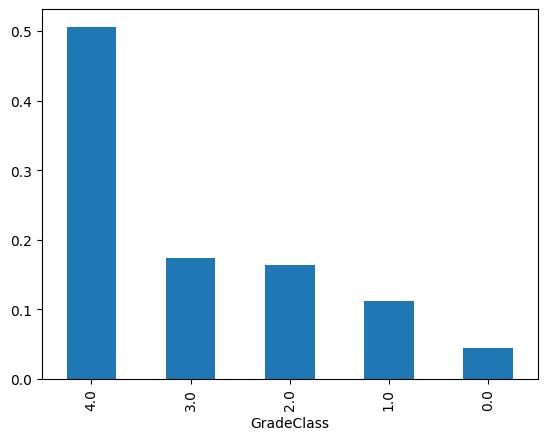

In [8]:
student_df[Y_COLUMN].value_counts(normalize=True).plot.bar()

So we seem to be dealing with an imbalanced dataset, as 50% of the target class have a value of 4, with the rest being fairly evenly distributed around the 20% mark. I will have to review the classification metrics to determine if this needs to be rebalanced.

### 1.2 Feature Distribution

On the outset we can drop StudentID from the features. I will also remove GPA from the features, as it is redundant given that we are trying to predict the class of GPA based on inputs.

In [9]:
FEATURES_TO_IGNORE = set(['StudentID', 'GPA'])

In [10]:
FEATURE_COLUMNS = [colname for colname in student_df.columns if colname != Y_COLUMN and colname not in FEATURES_TO_IGNORE]

In [11]:
student_df[FEATURE_COLUMNS].dtypes

Age                    int64
Gender                 int64
Ethnicity              int64
ParentalEducation      int64
StudyTimeWeekly      float64
Absences               int64
Tutoring               int64
ParentalSupport        int64
Extracurricular        int64
Sports                 int64
Music                  int64
Volunteering           int64
dtype: object

We seem to be dealing with numeric features which is helpful. I'll do a distribution plot to determine if any normalization will be needed.

array([[<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Gender'}>,
        <Axes: title={'center': 'Ethnicity'}>],
       [<Axes: title={'center': 'ParentalEducation'}>,
        <Axes: title={'center': 'StudyTimeWeekly'}>,
        <Axes: title={'center': 'Absences'}>],
       [<Axes: title={'center': 'Tutoring'}>,
        <Axes: title={'center': 'ParentalSupport'}>,
        <Axes: title={'center': 'Extracurricular'}>],
       [<Axes: title={'center': 'Sports'}>,
        <Axes: title={'center': 'Music'}>,
        <Axes: title={'center': 'Volunteering'}>]], dtype=object)

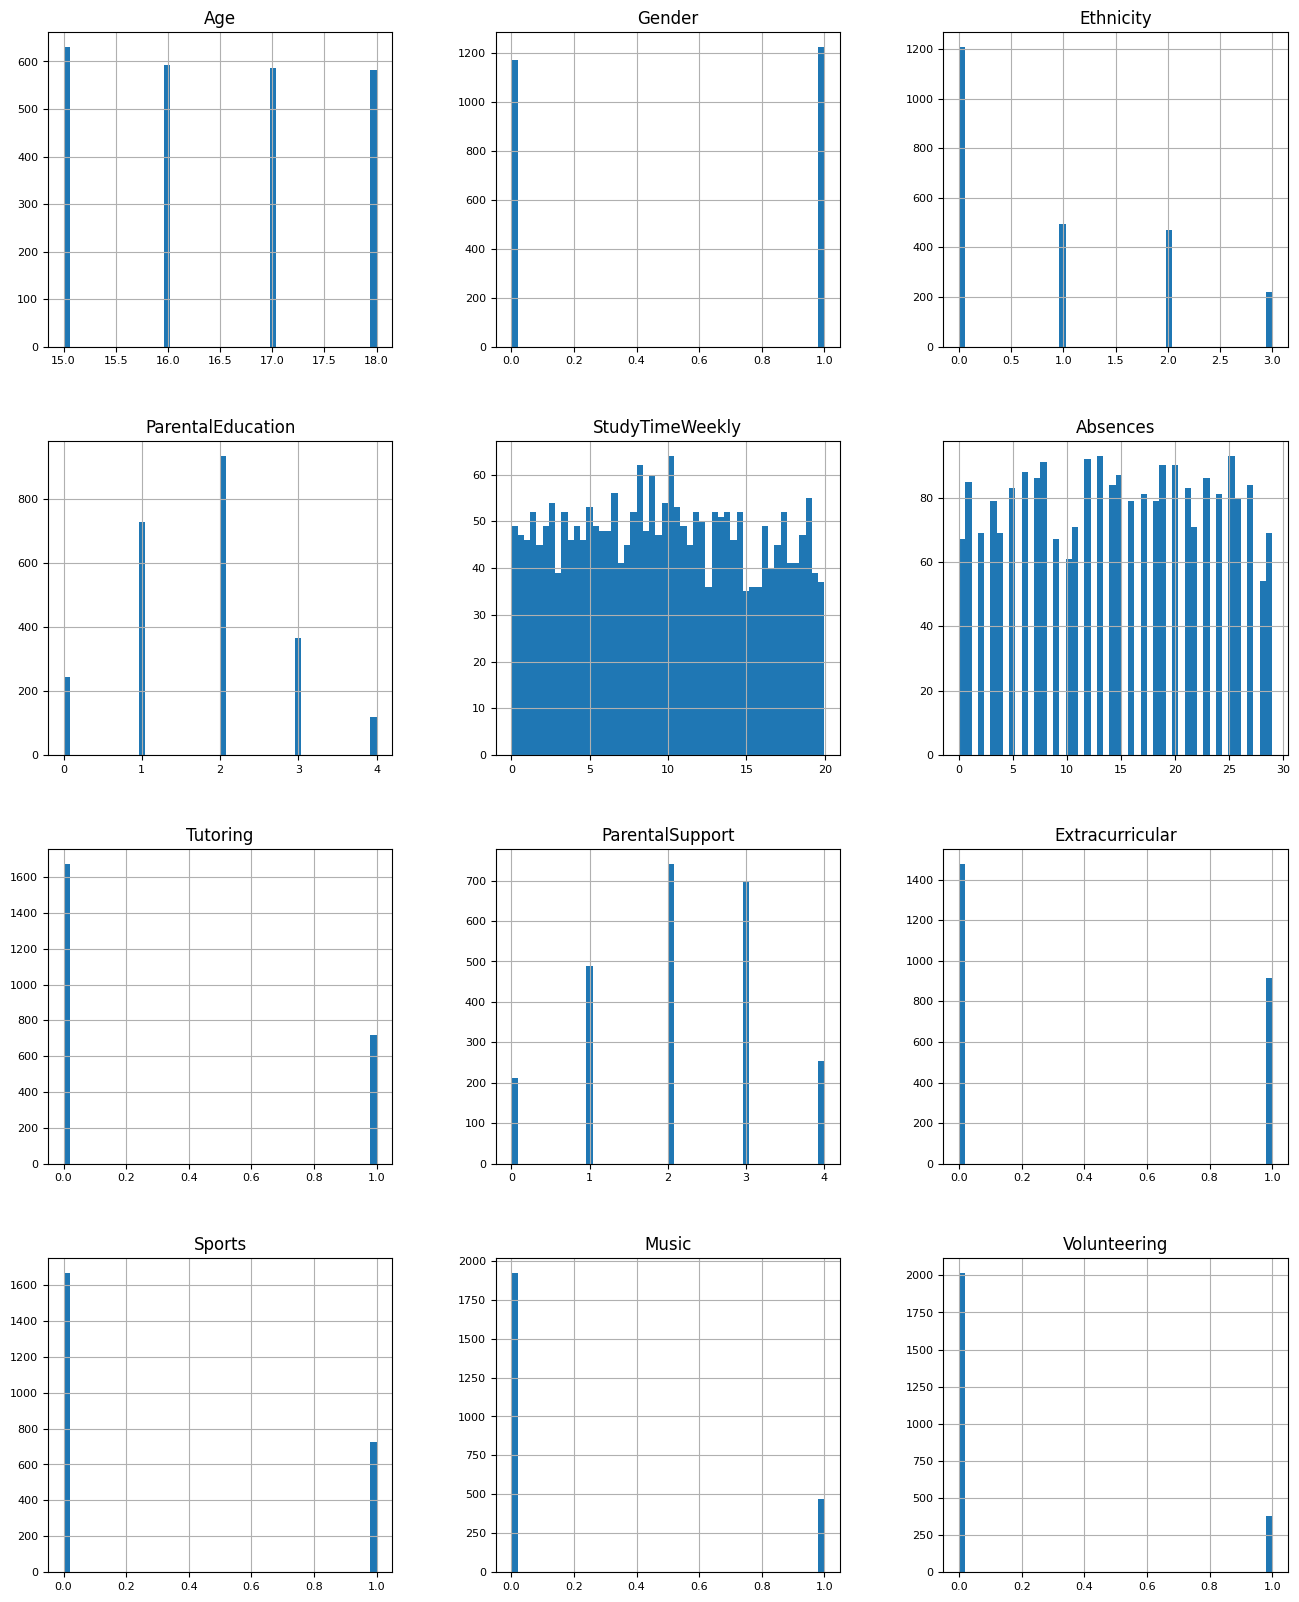

In [12]:
student_df[FEATURE_COLUMNS].hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8)

Observations on the features are below:

* The majority are Ordinal or Binary.
* The only Numerical Features appear to be StudyTimeWeekly and Absences. An interesting evaluation point will be whether these can be bucketed like the GPA.
* Numerical values seems to follow normal distribution so don't need to be normalized.

## 2. Train Test Split and Initial Model Training

First step is to split dataset, and train a Random Forest Classifier.

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegressionCV
from sklearn.ensemble import RandomForestClassifier

In [14]:
X = student_df[FEATURE_COLUMNS]
y = student_df[Y_COLUMN]

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=RANDOM_STATE)

In [102]:
lr_model = LogisticRegressionCV(
    cv=5,
    class_weight='balanced',
    penalty='l2',
    random_state=RANDOM_STATE,
    max_iter=1000,
    solver='liblinear'
)

In [103]:
lr_model.fit(X_train, y_train)

LogisticRegressionCV(class_weight='balanced', cv=5, max_iter=1000,
                     random_state=123, solver='liblinear')

## 3. Initial Model Evaluation

In [36]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

In [87]:
def get_metrics(y_true, y_pred, target):
    return {
        'target': target,
        'accuracy': accuracy_score(y_true, y_pred),
        'precision': precision_score(y_true, y_pred, average='weighted'),
        'recall': recall_score(y_true, y_pred, average='weighted'),
        'f_score': f1_score(y_true, y_pred, average='weighted')
     #   'auc_score': roc_auc_score(y_true, y_pred, average='weighted', multi_class='ovr')
    }

In [104]:
y_pred = lr_model.predict(X_test)

In [89]:
metrics_lr_orig = get_metrics(y_test, y_pred, 'Logistic Regression')

In [68]:
metrics_lr_orig

{'target': 'Logistic Regression',
 'accuracy': 0.6239554317548747,
 'precision': 0.6615114156207633,
 'recall': 0.6239554317548747,
 'f_score': 0.6318873176947442}

Not bad as a starting point, but lets see if we can improve the metrics by rebalancing the dataset.

## 4. Rebalancing Training Data using Logistic Regression

There are three methods I am going to use in order to address the imbalanced in the datasets:

1. Class Weights
2. SMOTE
3. Under Sampling

**Model Training Helper Methods**

In [53]:
from sklearn.model_selection import GridSearchCV


def grid_search_lr(X_train, y_train, class_weights, random_state=RANDOM_STATE):
    """Method which uses GridSearchCV to perform hyperparameter tuning to determine the best class weights to deal with imbalances.

    Args:
        X_train (_type_): _description_
        y_train (_type_): _description_
        class_weights (_type_): _description_
        random_state (_type_, optional): _description_. Defaults to RANDOM_STATE.

    Returns:
        _type_: _description_
    """
    model = LogisticRegressionCV(
        cv=5,
        random_state=random_state,
        max_iter=1000,
        solver='liblinear'
    )
    
    param_grid = {
        'Cs': [6, 8 ,10],
        'penalty': ['l1', 'l2'],
        'class_weight': class_weights
    }
    
    grid_search = GridSearchCV(
        estimator=model,
        scoring='f1_weighted',
        param_grid=param_grid,
        cv=5,
        verbose=True,
        n_jobs=-1
    )
    
    grid_search.fit(X_train, y_train)
    return grid_search.best_params_

**Resampling Helper Methods**

In [97]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

def resample(X_train, y_train, random_state=RANDOM_STATE):
    """Returns under and over sampled data

    Args:
        X_train (_type_): _description_
        y_train (_type_): _description_

    Returns:
        _type_: _description_
    """
    smote_sampler = SMOTE(random_state=random_state)
    under_sampler = RandomUnderSampler(random_state=random_state)
    X_smo, y_smo = smote_sampler.fit_resample(X_train, y_train)
    X_under, y_under = under_sampler.fit_resample(X_train, y_train)
    return X_smo, y_smo, X_under, y_under
    

### 4.1 Hyperparmeter Tuning Class Weights

In [55]:
class_weights = [
    'balanced',
    {0: 0.2, 1: 0.2, 2: 0.2, 3: 0.2, 4: 0.2},
    {0: 0.05, 1: 0.2, 2: 0.2, 3: 0.2, 4: 0.35}
]

I'll comment this out for now as I dont need to keep running it.

In [56]:
#best_params = grid_search_lr(X_train, y_train, class_weights)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


In [57]:
best_params

{'Cs': 8, 'class_weight': 'balanced', 'penalty': 'l2'}

In [58]:
lr_model_final = LogisticRegressionCV(
    Cs=8,
    cv=5,
    class_weight='balanced',
    penalty='l2',
    random_state=RANDOM_STATE,
    max_iter=1000,
    solver='liblinear'
)

In [59]:
lr_model_final.fit(X_train, y_train)

LogisticRegressionCV(Cs=8, class_weight='balanced', cv=5, max_iter=1000,
                     random_state=123, solver='liblinear')

In [90]:
y_pred = lr_model_final.predict(X_test)

In [91]:
metrics_lr_final = get_metrics(y_test, y_pred, 'LR Model Final')
metrics_lr_final

{'target': 'LR Model Final',
 'accuracy': 0.6239554317548747,
 'precision': 0.6615114156207633,
 'recall': 0.6239554317548747,
 'f_score': 0.6318873176947442}

A slight improvement but still not getting great accuracy. Will play around with using SMOTE, under and over sampling.

### 4.3 Under and Over Sampling

Now we are going to fit the original model using the under and over sampled datasets.

In [105]:
X_smo, y_smo, X_under, y_under = resample(X_train, y_train)

Prediction and metrics using SMO

In [108]:
lr_model.fit(X_smo, y_smo)
y_pred_smo = lr_model.predict(X_test)
metrics_lr_smo = get_metrics(y_test, y_pred_smo, 'Logistic Regression SMO')
metrics_lr_smo

{'target': 'Logistic Regression SMO',
 'accuracy': 0.5738161559888579,
 'precision': 0.5810635865003593,
 'recall': 0.5738161559888579,
 'f_score': 0.569809632401297}

Prediction and metrics using under

In [109]:
lr_model.fit(X_smo, y_smo)
y_pred_smo = lr_model.predict(X_test)
metrics_lr_under = get_metrics(y_test, y_pred_smo, 'Logistic Regression Under')
metrics_lr_under

{'target': 'Logistic Regression Under',
 'accuracy': 0.5738161559888579,
 'precision': 0.5810635865003593,
 'recall': 0.5738161559888579,
 'f_score': 0.569809632401297}

In [110]:
logistic_metrics = pd.DataFrame([metrics_lr_orig, metrics_lr_final, metrics_lr_smo, metrics_lr_under])
logistic_metrics

,target,accuracy,precision,recall,f_score
0,Logistic Regression,0.619777,0.658067,0.619777,0.628616
1,LR Model Final,0.623955,0.661511,0.623955,0.631887
2,Logistic Regression SMO,0.573816,0.581064,0.573816,0.569810
3,Logistic Regression Under,0.573816,0.581064,0.573816,0.569810
